<a href="https://colab.research.google.com/github/wissalelkhaoulani/DS-1/blob/main/EL_KHAOULANI_WISSALE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [14]:
#To get the help of a function, see an example below.
from sklearn.neighbors import KNeighborsClassifier
# to get the online help, type:
?KNeighborsClassifier

In [8]:
# Load the data and show its summary. How many samples and inputs do we have?
 import pandas as pd
 import numpy as np
 # The original link for winequality-white.csv is no longer valid, resulting in a 404 error.
 # However, the full dataset (including both red and white wines) has already been fetched
 # successfully using ucimlrepo in the previous cell and is available in the 'wine_quality' object.

 # Access the original combined dataframe (red and white wines)
 df_combined = wine_quality.data.original

 # Filter for white wine, as per the original intent to load 'winequality-white.csv'
 df = df_combined[df_combined['color'] == 'white'].copy()

 # Drop the 'color' column as it's no longer needed after filtering
 df = df.drop(columns=['color'])

 print("\n========= Dataset summary ========= \n")
 df.info()
 print("\n========= A few first samples ========= \n")
 print(df.head())


========= Dataset summary ========= 

<class 'pandas.core.frame.DataFrame'>
Index: 4898 entries, 1599 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 497.5 KB

========= A few first samples ========= 

      fixed_acidity  volatile_acidity  citric_

In [17]:
# Form the arrays X RN d of the input variables and Y RN the output. What are the
#wine qualities and the related number of samples ?
X = df.drop("quality", axis=1) #we drop the column "quality"
Y = df["quality"]
print("\n========= Wine Qualities ========= \n")
print(Y.value_counts())


========= Wine Qualities ========= 

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


In [10]:
 # bad wine (y=0) : quality <= 5 and good quality (y= 1) otherwise
 Y = [0 if val <=5 else 1 for val in Y]

/tmp/ipython-input-1712478130.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


<Axes: >

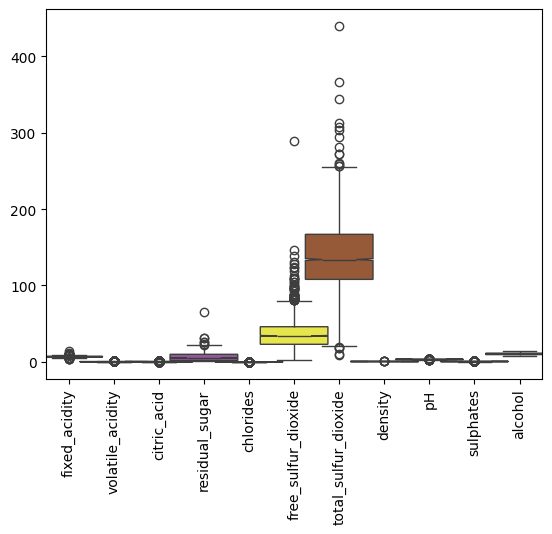

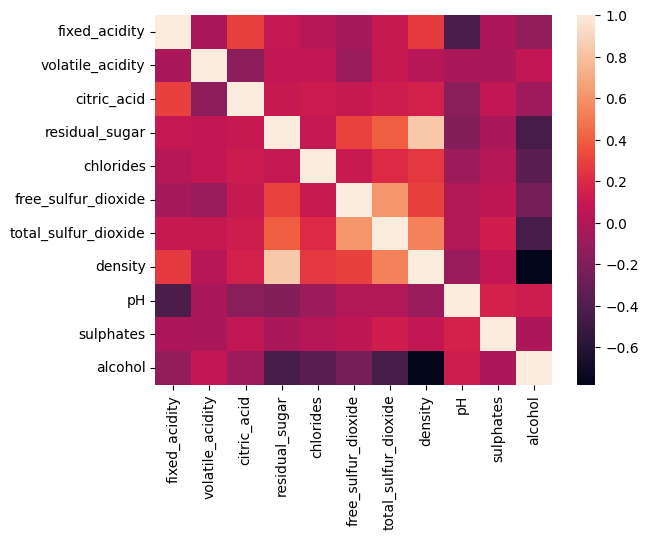

In [11]:
 import matplotlib.pyplot as plt
 import seaborn as sns
 plt.figure()
 ax = plt.gca()
 sns.boxplot(data=X,orient="v",palette="Set1",width=1.5, notch=True)
 ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
 plt.figure()
 corr = X.corr()
 sns.heatmap(corr)

In [21]:
#Data split
from sklearn.model_selection import train_test_split
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=1/3,
 stratify=Y)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.5,
 stratify=Ya)

In [23]:
#k nearest neighbor (k-NN) classification
from sklearn.neighbors import KNeighborsClassifier
# Fit the model on (Xa, Ya)
k = 3
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(Xa, Ya)

KNeighborsClassifier(n_neighbors=3)

In [24]:
 # Predict the labels of samples in Xv
 Ypred_v = clf.predict(Xv)
 # evaluate classification error rate
 from sklearn.metrics import accuracy_score
 error_v = 1-accuracy_score(Yv, Ypred_v)

In [26]:
 # some hints
 k_vector = np.arange(1, 37, 2) #define a vector of k=1, 3, 5, ...
 error_train = np.empty(k_vector.shape)
 error_val = np.empty(k_vector.shape)
 for ind, k in enumerate(k_vector):
     #fit with k
     clf = KNeighborsClassifier(n_neighbors = k)
     clf.fit(Xa, Ya)
     # predict and evaluate on training and validation sets
     Ypred_train = clf.predict(Xa)
     error_train[ind] = 1 - accuracy_score(Ya, Ypred_train)
     Ypred_val = clf.predict(Xv)
     error_val[ind] = 1 - accuracy_score(Yv, Ypred_val)

This code block is designed to evaluate the performance of the K-Nearest Neighbors (k-NN) classification model for different values of k (the number of neighbors). Here's a breakdown:

k_vector = np.arange(1, 37, 2): This line creates an array of odd numbers from 1 to 35. These are the k values that will be tested.
error_train = np.empty(k_vector.shape) and error_val = np.empty(k_vector.shape): These lines initialize two empty arrays to store the classification error rates for the training set and the validation set, respectively, for each k value.
for ind, k in enumerate(k_vector):: This loop iterates through each k value in k_vector.
clf = KNeighborsClassifier(n_neighbors = k): Inside the loop, a new KNeighborsClassifier model is created for each k value.
clf.fit(Xa, Ya): The model is then trained (fitted) using the training features (Xa) and training labels (Ya).
Ypred_train = clf.predict(Xa): The trained model makes predictions on the training data itself.
error_train[ind] = 1 - accuracy_score(Ya, Ypred_train): The training error is calculated as 1 - accuracy using the actual training labels (Ya) and the predicted training labels (Ypred_train). This error is stored in the error_train array.
Ypred_val = clf.predict(Xv): The model also makes predictions on the unseen validation data (Xv).
error_val[ind] = 1 - accuracy_score(Yv, Ypred_val): Similarly, the validation error is calculated using the actual validation labels (Yv) and the predicted validation labels (Ypred_val) and stored in the error_val array.
In essence, this code systematically tests how well the k-NN model performs on both seen (training) and unseen (validation) data as the k parameter changes. This is a crucial step for hyperparameter tuning to find the optimal k value that generalizes well to new data without overfitting or underfitting.



In [27]:
 # some hints: get the min error and related k-value
 err_min, ind_opt = error_val.min(), error_val.argmin()
 k_star = k_vector[ind_opt]

Normalize or not normalize the data

In [29]:
 from sklearn.preprocessing import StandardScaler
 sc = StandardScaler(with_mean=True, with_std=True)
 sc = sc.fit(Xa)
 Xa_n = sc.transform(Xa)
 Xv_n = sc.transform(Xv)